In [1]:
!pip install --upgrade pingouin

     |████████████████████████████████| 204 kB 928 kB/s eta 0:00:01
     |████████████████████████████████| 801 kB 4.4 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.3.11-py3-none-any.whl size=203323 sha256=b2e60e39876b9d655d146c03335443797fd1bf64b7057395d948eee816412d79
  Stored in directory: /Users/leosilva/Library/Caches/pip/wheels/74/6d/d2/9320ff7695f6983f4394c10630792f4bd4c8351facfd39b649
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=49f1882194cf5aac5cb32bab636f7d1291c7b3bdf4b04f334e1a81bef236a316
  Stored in directory: /Users/leosilva/Library/Caches/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
from math import pi
from matplotlib.gridspec import GridSpec
from dateutil.relativedelta import *
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import scipy.stats
import pingouin as pg

In [3]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [4]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35,36,37,38
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491,18289937,172880784,18609547
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela,Thamara Andrade,felipe.ts ⚡,Juan Lopes
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita,thamyk,felipefialho_,juanplopes
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte,"Belo Horizonte, Brazil.",Dark Side of the Moon,"Rio de Janeiro, Brasil"
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK,https://t.co/JWBzdmQOcV,https://t.co/yPuEuh1bn9,https://t.co/Uhw9rEUK2v


In [5]:
def create_tweets_pd(data, id_user):

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [6]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result['final_score'].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df["final_score"]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

In [7]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
#     create_line_plot(tweets_pd, id_user)

In [8]:
# DATA CONSIDERING THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: all')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
    print('mean: {}'.format(vader_df['final_score'].mean()))
    qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
    qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
    qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
    qtd_total = vader_df['final_polarity'].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean'].append(vader_df['final_score'].mean())

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: all
mean: -0.00996554810875171
pos: 1991
neu: 737
neg: 2311
% pos: 39.51180789839254
% neu: 14.625917840841437
% neg: 45.86227426076602

id_user: 27
lexicon: all
mean: 0.0113417968234777
pos: 2009
neu: 718
neg: 1822
% pos: 44.163552429105295
% neu: 15.783688722796219
% neg: 40.052758848098485

id_user: 28
lexicon: all
mean: 0.00986910406202596
pos: 2774
neu: 599
neg: 2560
% pos: 46.755435698634756
% neu: 10.096072813079386
% neg: 43.148491488285856

id_user: 29
lexicon: all
mean: 0.013734385562854595
pos: 1506
neu: 606
neg: 1237
% pos: 44.968647357420124
% neu: 18.09495371752762
% neg: 36.93639892505225

id_user: 30
lexicon: all
mean: 0.11796156769861296
pos: 2016
neu: 339
neg: 817
% pos: 63.55611601513241
% neu: 10.687263556116015
% neg: 25.756620428751575

id_user: 31
lexicon: all
mean: 0.05302113797148096
pos: 3342
neu: 470
neg: 2184
% pos: 55.73715810540361
% neu: 7.838559039359573
% neg: 36.424282855236825

id_user: 32
lexicon: all
mean: 0.077959142519621
pos:

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479


In [9]:
# DATA WITHOUT THE NEUTRAL POLARITY

df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
            'mean_all' : [],
            'mean_posneg' : []
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: all')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
    final_score = vader_df.query('final_polarity == "pos"')['final_score'].tolist()
    final_score.extend(vader_df.query('final_polarity == "neg"')['final_score'].tolist())
    print(len(final_score))
    print(statistics.mean(final_score))
    print('mean: {}'.format(vader_df['final_score'].mean()))
    qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
    qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
    qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
    qtd_total = vader_df['final_polarity'].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)
    df_dict['mean_all'].append(vader_df['final_score'].mean())
    df_dict['mean_posneg'].append(statistics.mean(final_score))

df_chart = pd.DataFrame(df_dict)
df_chart
    

id_user: 26
lexicon: all
4302
-0.011672802631334262
mean: -0.00996554810875171
pos: 1991
neu: 737
neg: 2311
% pos: 39.51180789839254
% neu: 14.625917840841437
% neg: 45.86227426076602

id_user: 27
lexicon: all
3831
0.01346745856173323
mean: 0.0113417968234777
pos: 2009
neu: 718
neg: 1822
% pos: 44.163552429105295
% neu: 15.783688722796219
% neg: 40.052758848098485

id_user: 28
lexicon: all
5334
0.010977389276340456
mean: 0.00986910406202596
pos: 2774
neu: 599
neg: 2560
% pos: 46.755435698634756
% neu: 10.096072813079386
% neg: 43.148491488285856

id_user: 29
lexicon: all
2743
0.016768668337586584
mean: 0.013734385562854595
pos: 1506
neu: 606
neg: 1237
% pos: 44.968647357420124
% neu: 18.09495371752762
% neg: 36.93639892505225

id_user: 30
lexicon: all
2833
0.1320769829650547
mean: 0.11796156769861296
pos: 2016
neu: 339
neg: 817
% pos: 63.55611601513241
% neu: 10.687263556116015
% neg: 25.756620428751575

id_user: 31
lexicon: all
5526
0.05753071720539269
mean: 0.05302113797148096
pos: 3

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734,0.016769
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959,0.084840
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815,-0.056760
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716


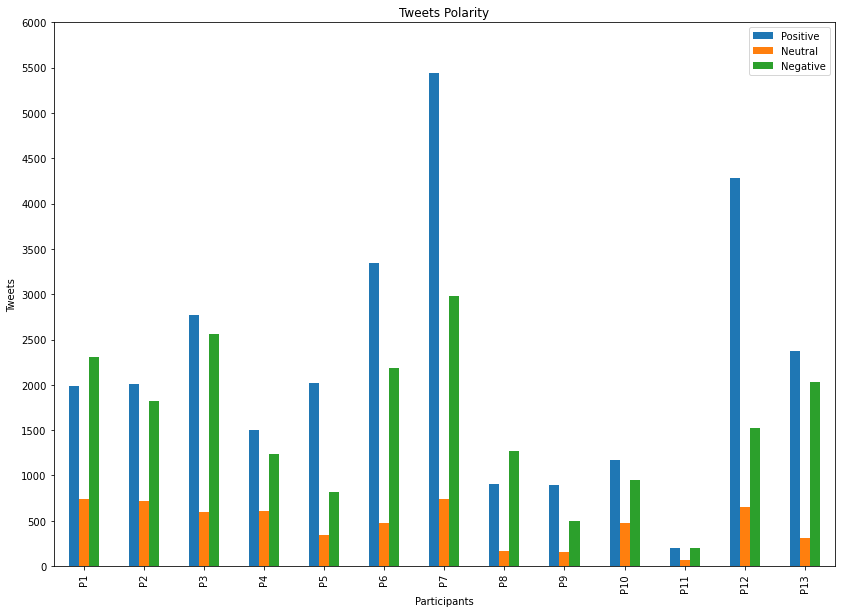

In [10]:
# multiple bar plots

bar_chart_data = []

y_range = range(0,6001, 500)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

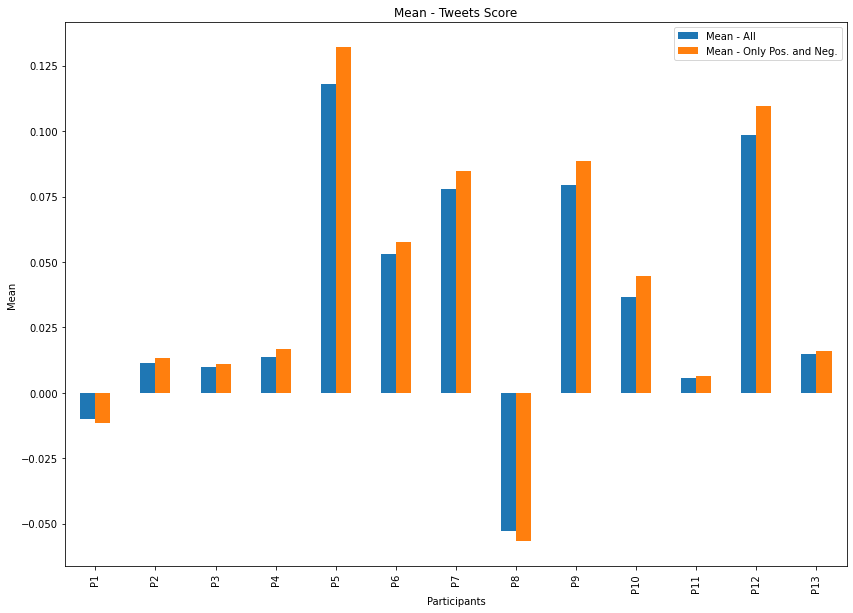

In [11]:
# multiple bar plots with means

bar_chart_data = []

y_range = range(-1,1)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['mean_all'], df_chart.iloc[i]['mean_posneg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","mean_all","mean_posneg"])
df.plot(x="Participant", y=["mean_all", "mean_posneg"], kind="bar",figsize=(14,10))

plt.legend(["Mean - All", "Mean - Only Pos. and Neg."])
plt.title('Mean - Tweets Score')
plt.xlabel('Participants')
plt.ylabel('Mean')

plt.show()

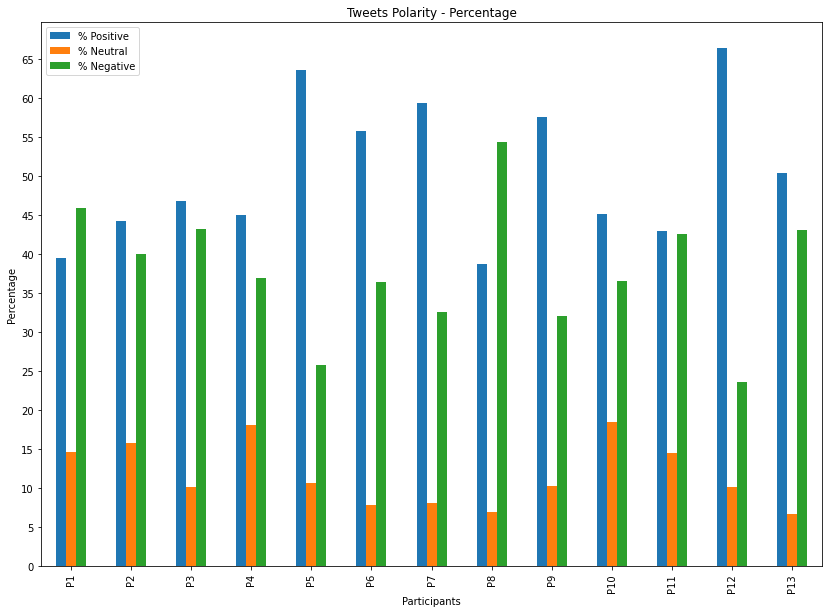

In [12]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i+1), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()

In [13]:
bigfive = {}

for c in data:
    id_user = c

    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        id = int(df_bf[6])

        del df_bf[0]
        del df_bf[6]

        df_bf.columns = ['O', 'C', 'E', 'A', 'N']

        bigfive[id] = df_bf

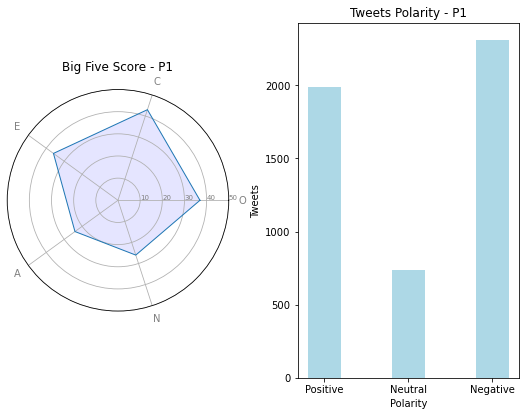

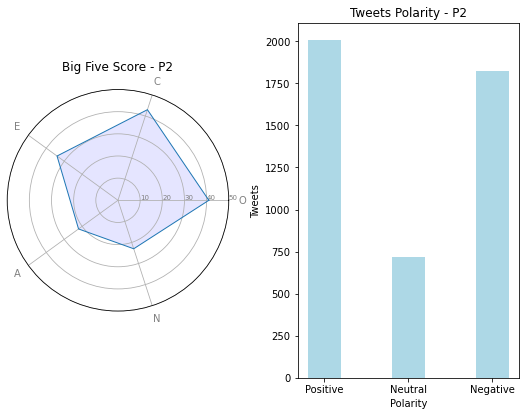

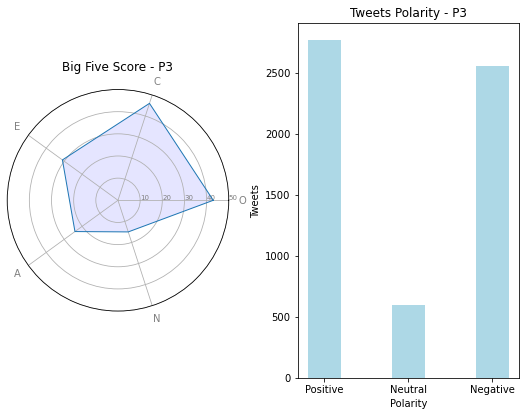

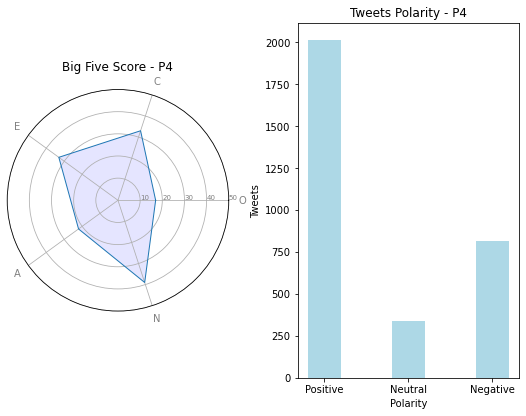

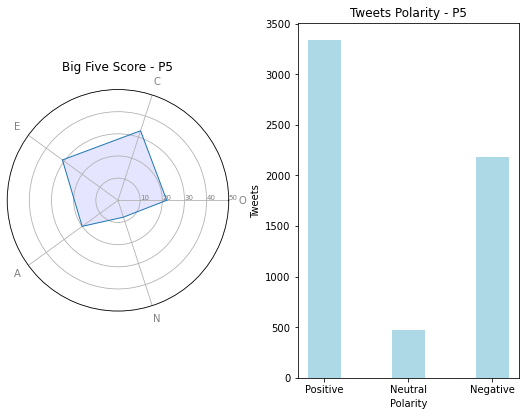

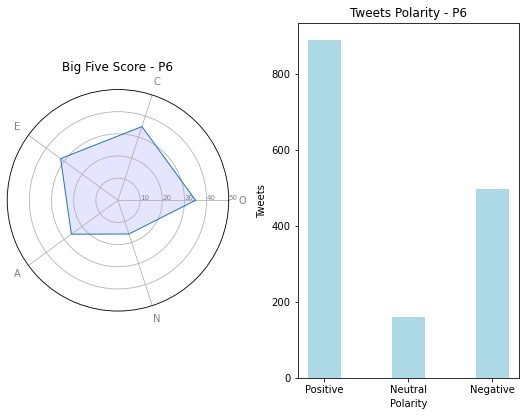

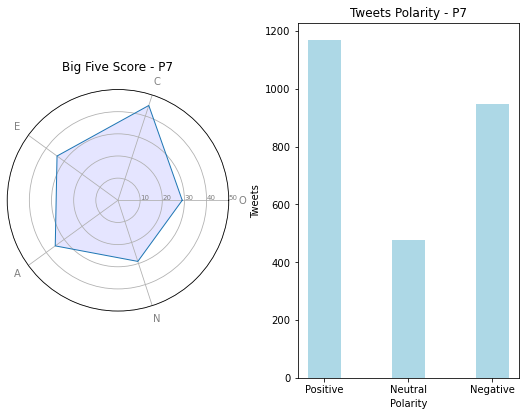

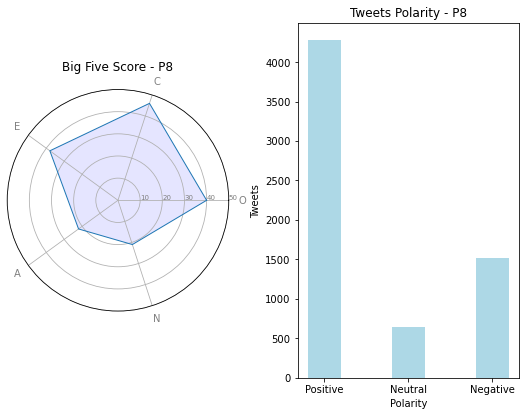

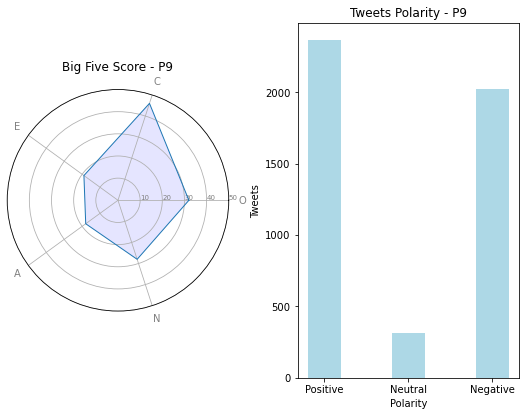

In [14]:
count = 1

for i in bigfive:
    b = bigfive[i]

    o = [b['O']]
    c = [b['C']]
    e = [b['E']]
    a = [b['A']]
    n = [b['N']]

    # Set data
    df = pd.DataFrame({
    'group': ['A'],
    'O': o,
    'C': c,
    'E': e,
    'A': a,
    'N': n
    })

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    
    fig = plt.figure(figsize=(8, 6))
    gs = GridSpec(nrows=1, ncols=2)
    
    # Initialise the spider plot
    ax = fig.add_subplot(gs[0, 0])
    ax = plt.subplot(121, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30, 40, 50], ["10","20","30", '40', '50'], color="grey", size=7)
    plt.ylim(0,50)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title('Big Five Score - P{}'.format(count))
    
#     plt.tight_layout()

    # Show the graph
#     plt.show()
    
    plt.subplot(122)
    
    y_range = range(0,6001, 500)

    d = {"Positive": int(df_chart.query('id_user == {}'.format(i))['pos']), 
         "Neutral": int(df_chart.query('id_user == {}'.format(i))['neu']), 
         "Negative": int(df_chart.query('id_user == {}'.format(i))['neg'])}
    
#     plt.figure(figsize = (8, 6))

    plt.tight_layout(pad=2.8)
#     plt.subplot_tool()
 
    # creating the bar plot
    plt.bar(d.keys(), d.values(), width = 0.4, color = 'lightblue')

    plt.title('Tweets Polarity - P{}'.format(count))
    plt.xlabel('Polarity')
    plt.ylabel('Tweets')

    plt.show()
    
    count += 1

In [15]:
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734,0.016769
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531
6,32,5445,744,2985,59.352518,8.109876,32.537606,0.077959,0.084840
7,33,902,162,1267,38.695839,6.949807,54.354354,-0.052815,-0.056760
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716


[Text(1, 0, 'Positive'), Text(2, 0, 'Negative'), Text(3, 0, 'Neutral')]

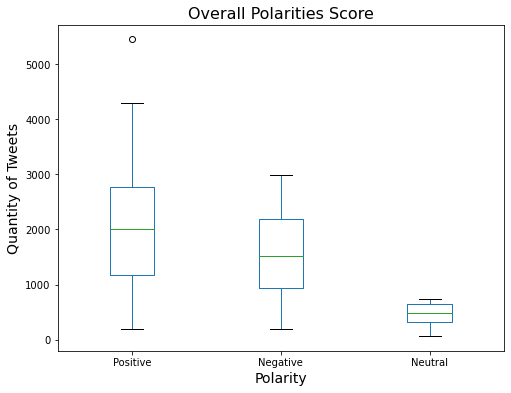

In [16]:
bplot = df_chart.boxplot(column=['pos', 'neg', 'neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("Quantity of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive', 'Negative', 'Neutral'])

[Text(1, 0, 'Positive (%)'),
 Text(2, 0, 'Negative (%)'),
 Text(3, 0, 'Neutral (%)')]

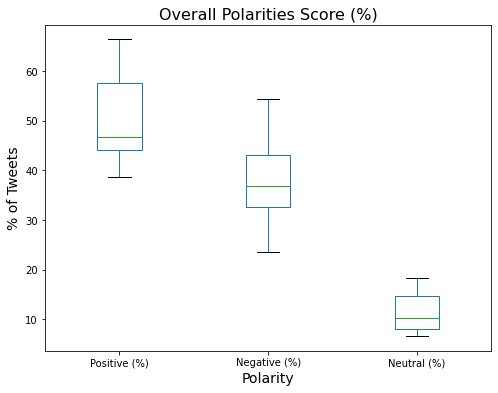

In [17]:
bplot = df_chart.boxplot(column=['por_pos', 'por_neg', 'por_neu'], grid=False, figsize=(8,6))

bplot.axes.set_title("Overall Polarities Score (%)", fontsize=16)
 
bplot.set_xlabel("Polarity", fontsize=14) 
bplot.set_ylabel("% of Tweets", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['Positive (%)', 'Negative (%)', 'Neutral (%)'])

[Text(1, 0, 'All Polarities'), Text(2, 0, 'Only Positives and Negatives')]

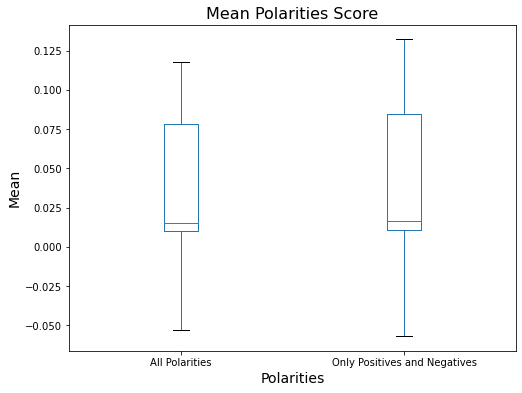

In [18]:
bplot = df_chart.boxplot(column=['mean_all', 'mean_posneg'], grid=False, figsize=(8,6))

bplot.axes.set_title("Mean Polarities Score", fontsize=16)
 
bplot.set_xlabel("Polarities", fontsize=14) 
bplot.set_ylabel("Mean", fontsize=14)
bplot.tick_params(labelsize=10)
bplot.set_xticklabels(['All Polarities', 'Only Positives and Negatives'])

In [19]:
def plot_point_chart(df, count, id_user):

    first_date = df.iloc[0]['date_minus_time']
    
    for i in range(1,13):
        end_date = first_date + relativedelta(months=+3)
        mask = (df['created_at'] >= first_date) & (df['created_at'] < end_date)
        new_df = df.loc[mask]
        
        fig, ax = plt.subplots(figsize=(24, 8))
    
        x = new_df['date_minus_time']
        y = new_df['final_score']

        x_ticks = x

        colors = {'pos':'green', 'neu':'orange', 'neg':'red'}

        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xticks(x_ticks, rotation='vertical', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score', fontsize=16)
        
        plt.title('Scatter Plot for P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.legend()

        plt.scatter(x, y, alpha=0.7, c=new_df['final_polarity'].map(colors))
        
#         plt.savefig('images/scatter_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        first_date = end_date

In [20]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    del df['text']
    del df['vader_sentiment_analysis_score']
    del df['vader_sentiment_analysis_polarity']
    del df['oplexicon_sentiment_analysis_score']
    del df['oplexicon_sentiment_analysis_polarity']
    del df['sentistrength_sentiment_analysis_score']
    del df['sentistrength_sentiment_analysis_polarity']
    del df['sentilexpt_sentiment_analysis_score']
    del df['sentilexpt_sentiment_analysis_polarity']
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
#     df.set_index(df["date_minus_time"],inplace=True)
    
#     plot_point_chart(df, count, id_user)
    
    count += 1

In [21]:
tweets_pd = create_tweets_pd(data, id_user)
df = pd.DataFrame(tweets_pd)
df.head()

,text,created_at,id_user,vader_sentiment_analysis_score,vader_sentiment_analysis_polarity,oplexicon_sentiment_analysis_score,oplexicon_sentiment_analysis_polarity,sentistrength_sentiment_analysis_score,sentistrength_sentiment_analysis_polarity,sentilexpt_sentiment_analysis_score,sentilexpt_sentiment_analysis_polarity,final_score,final_polarity
0,@mauriciojr Eu usei bastante Eclipse e acho o ...,2021-03-31T23:11:12,38,0.7096,pos,0.250000,pos,0.458831,pos,0.000000,neu,0.354608,pos
1,"Piada a parte, parece um sanduíche meio ruim m...",2021-03-31T20:35:20,38,-0.3612,neg,-0.250000,neg,0.000000,neu,-0.458831,neg,-0.267508,neg
2,"Tava querendo um sanduíche, mas acho que esse ...",2021-03-31T20:27:23,38,-0.8807,neg,0.458831,pos,-0.250000,neg,0.000000,neu,-0.167967,neg
3,O ícone do Slack no Mac mudou de forma tão sut...,2021-03-31T15:03:38,38,-0.4767,neg,0.000000,neu,-0.250000,neg,0.000000,neu,-0.181675,neg
4,"@rochacbruno Caraca, eu tô viciado nessa músic...",2021-03-30T20:39:03,38,0.2182,pos,-0.458831,neg,0.000000,neu,-0.250000,neg,-0.122658,neg


In [22]:
# fig, ax = plt.subplots(figsize=(24, 8))



# # plotting the line 1 points 
# plt.plot(df_final.index, df_final['final_score_pos'], label = "pos", marker='o', markerfacecolor='none', color = 'green')

# # plotting the line 2 points 
# plt.plot(df_final.index, df_final['final_score_neg'], label = "neg", marker='o', markerfacecolor='none', color = 'red')


# plt.xlabel('x - axis')
# # Set the y axis label of the current axis.
# plt.ylabel('y - axis')
# # Set a title of the current axes.
# plt.title('Two or more lines on same plot with suitable legends ')
# # show a legend on the plot
# plt.legend()
# # Display a figure.
# plt.show()

In [23]:
def plot_point_chart_pos_neg(df, count, id_user):

    first_date = df.index[0]
    
    for i in range(1,13):
        
        fig, ax = plt.subplots(figsize=(24, 8))

        end_date = first_date + relativedelta(months=+3)
        mask = (df.index >= first_date) & (df.index < end_date)
        new_df = df.loc[mask]
        
        x_ticks = new_df.index

        plt.xticks(x_ticks, rotation='vertical', fontsize=16)
        plt.yticks(np.arange(-1.0, 1.1, 0.1), fontsize=16)
        plt.xlabel('Day', fontsize=16)
        plt.ylabel('Polarity Score Mean', fontsize=16)

        date_form = DateFormatter("%Y-%m-%d")
        ax.xaxis.set_major_formatter(date_form)
    
        x = new_df.index
        y1 = new_df['final_score_pos']
        y2 = new_df['final_score_neg']
        y3 = new_df['mean']

        plt.title('Scatter Plot - Polarity Means - P{}, User {} - From {} To {}'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")), fontsize=20)
        
        plt.rcParams.update({
            "savefig.facecolor": (1.0, 1.0, 1.0)
        })
        
        plt.axhline(y=0.0, color='orange', linestyle='-', alpha=0.7, linewidth=4)
        
#         # plotting the line 1 points 
#         plt.scatter(new_df.index, new_df['final_score_pos'], label = "pos", marker='o', color = 'green')

#         # plotting the line 2 points 
#         plt.scatter(new_df.index, new_df['final_score_neg'], label = "neg", marker='o', color = 'red')
        
        
        # plotting the line 1 points 
        plt.plot(new_df.index, new_df['final_score_pos'], label = "pos", marker='o', markerfacecolor='none', color = 'green')

        # plotting the line 2 points 
        plt.plot(new_df.index, new_df['final_score_neg'], label = "neg", marker='o', markerfacecolor='none', color = 'red')
        
        # plotting the line 3 points 
        plt.plot(new_df.index, new_df['mean'], label = "mean", marker='o', markerfacecolor='none', color = 'gray', linestyle='--')
        
        plt.legend()
        
#         plt.savefig('images/scatter_pol_means_P{}_U{}_{}_{}.pdf'.format(count, id_user, first_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d")),bbox_inches='tight',transparent=False)
        
        plt.show()
        
        first_date = end_date

In [24]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)
    del df['text']
    del df['vader_sentiment_analysis_score']
    del df['vader_sentiment_analysis_polarity']
    del df['oplexicon_sentiment_analysis_score']
    del df['oplexicon_sentiment_analysis_polarity']
    del df['sentistrength_sentiment_analysis_score']
    del df['sentistrength_sentiment_analysis_polarity']
    del df['sentilexpt_sentiment_analysis_score']
    del df['sentilexpt_sentiment_analysis_polarity']
    
    df = df.sort_values(by='created_at')
    
    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)
    
    df_pos = df.query("final_polarity == 'pos'")
    df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
    
    df_neg = df.query("final_polarity == 'neg'")
    df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())
    
    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['final_score_pos', 'final_score_neg']
    
    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
    
#     plot_point_chart_pos_neg(df_final, count, id_user)
    
    count += 1

In [25]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

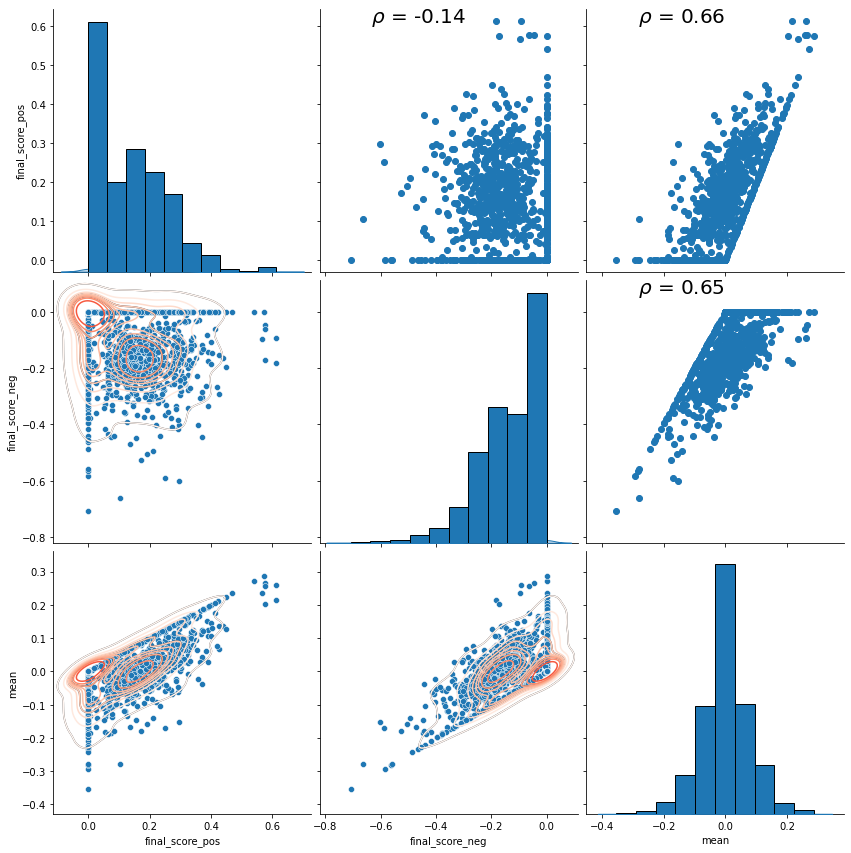

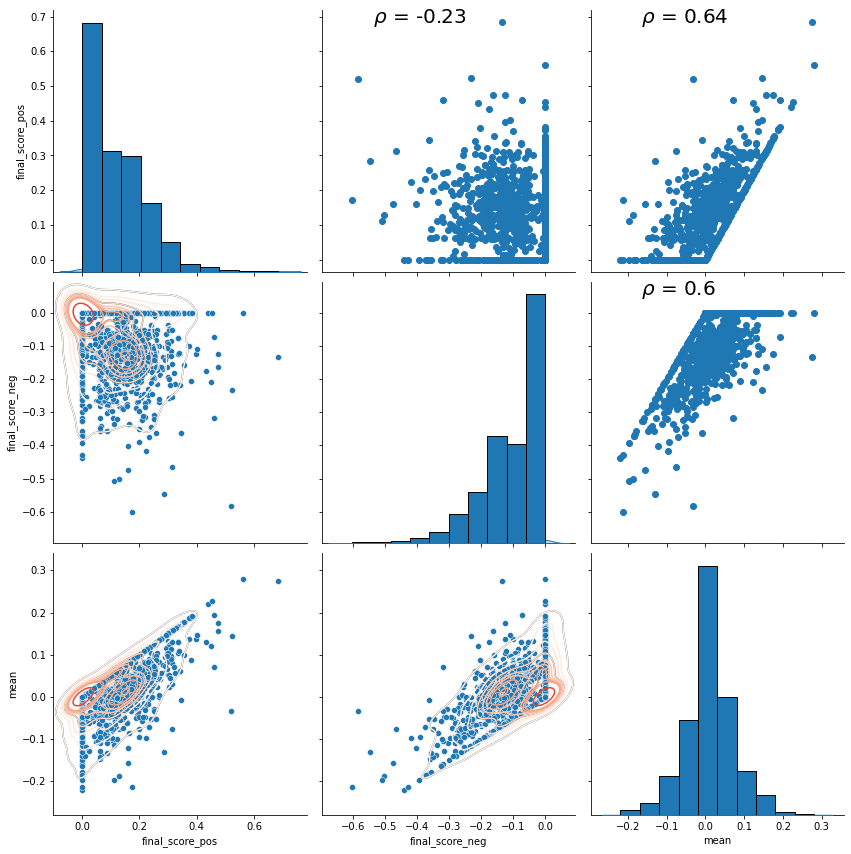

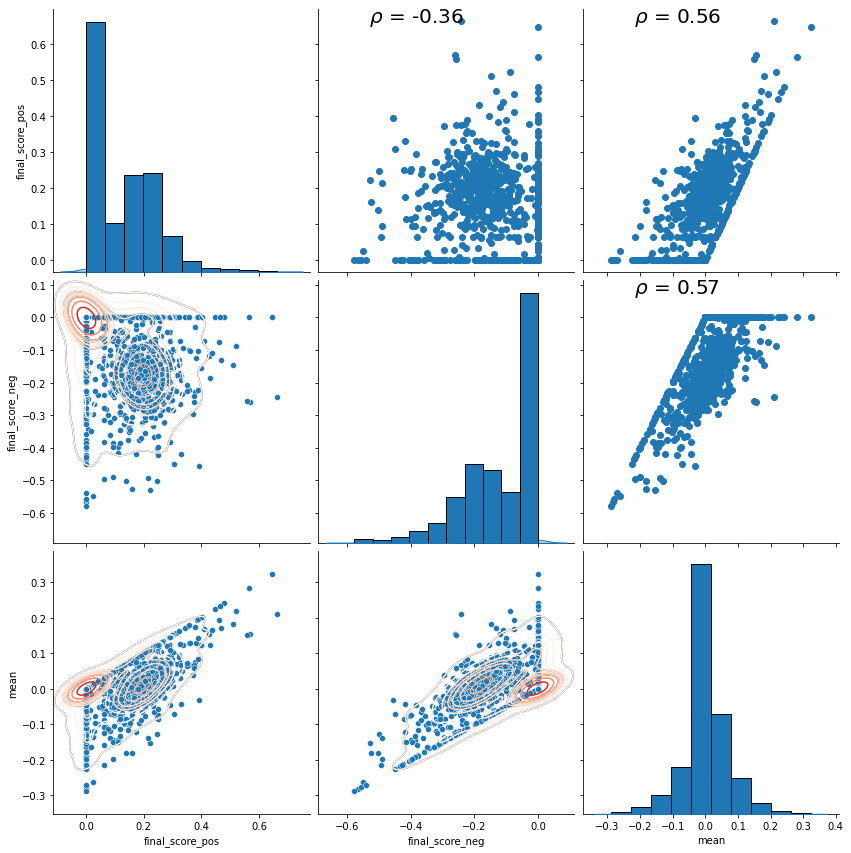

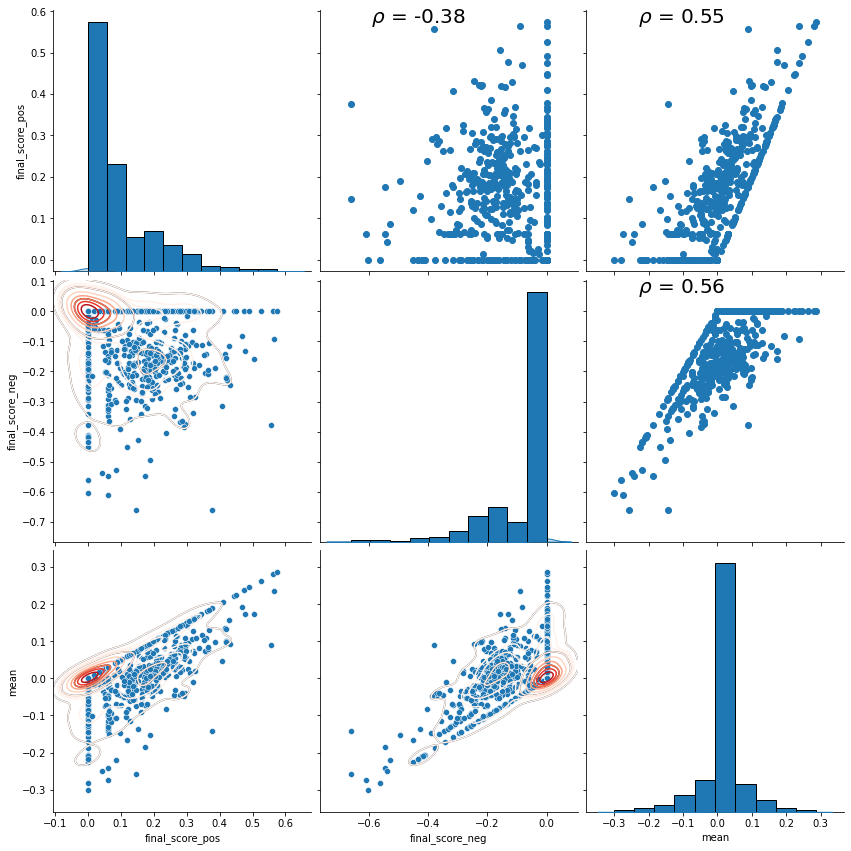

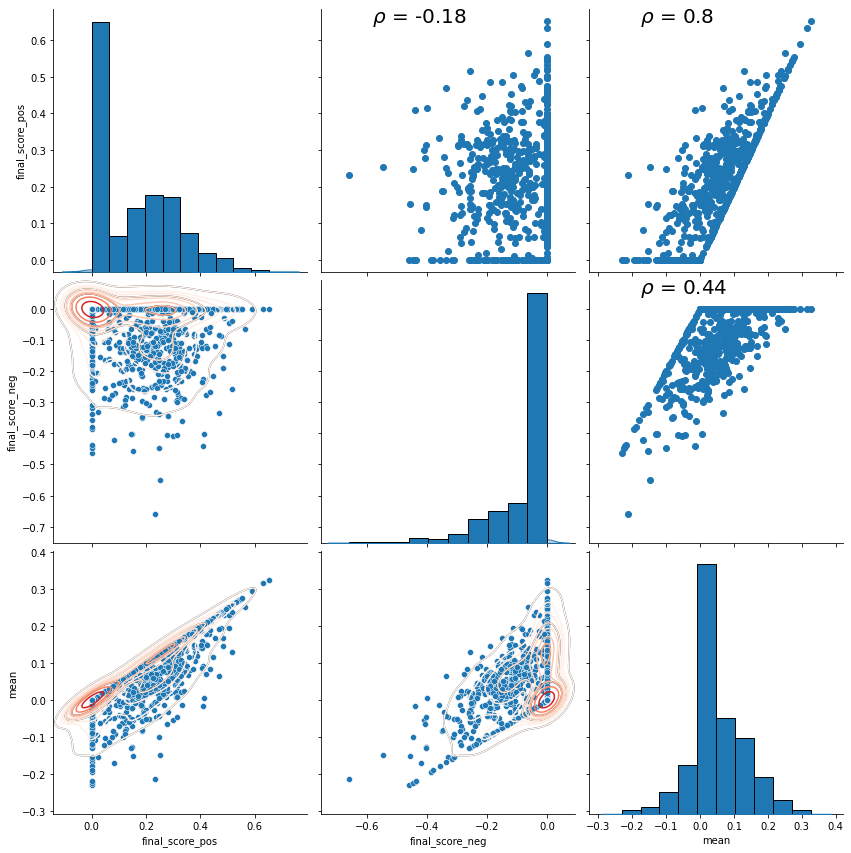

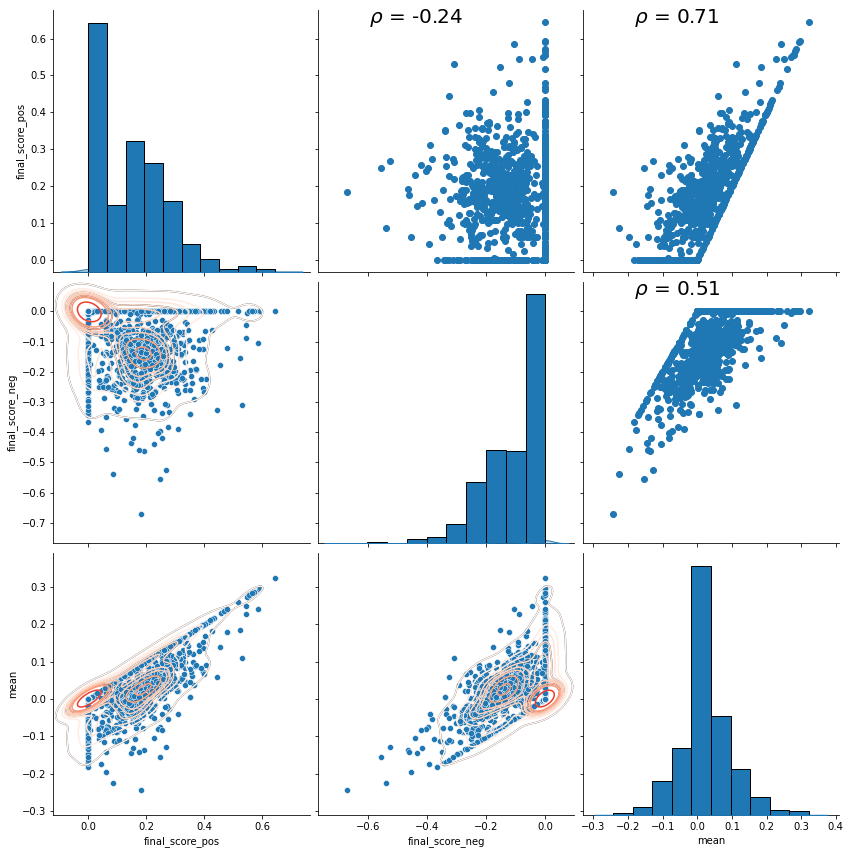

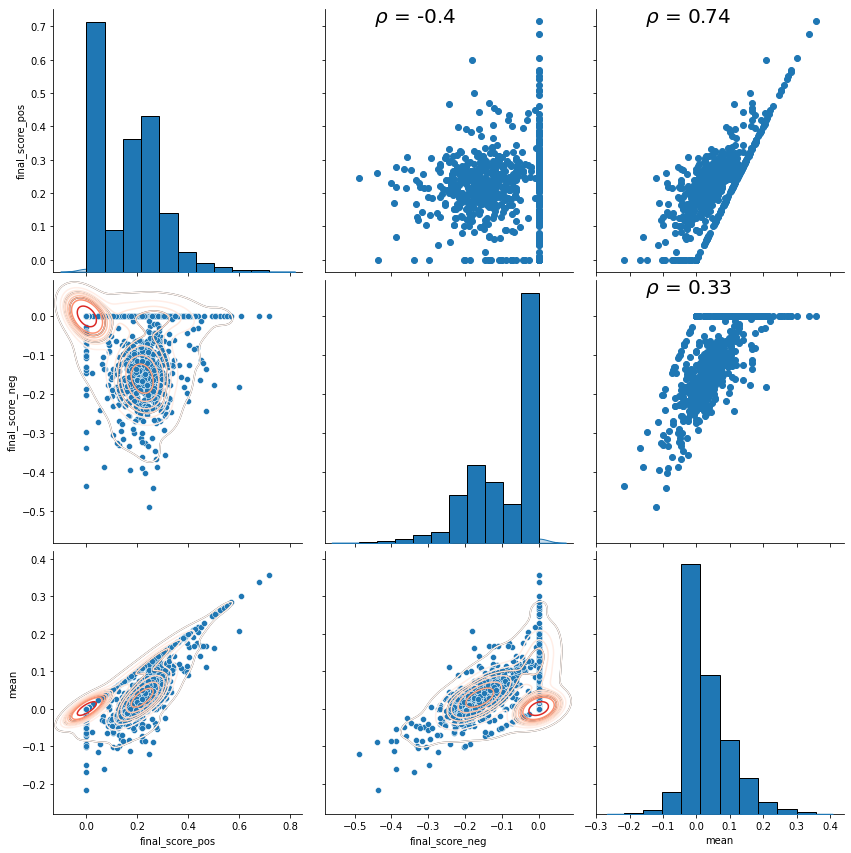

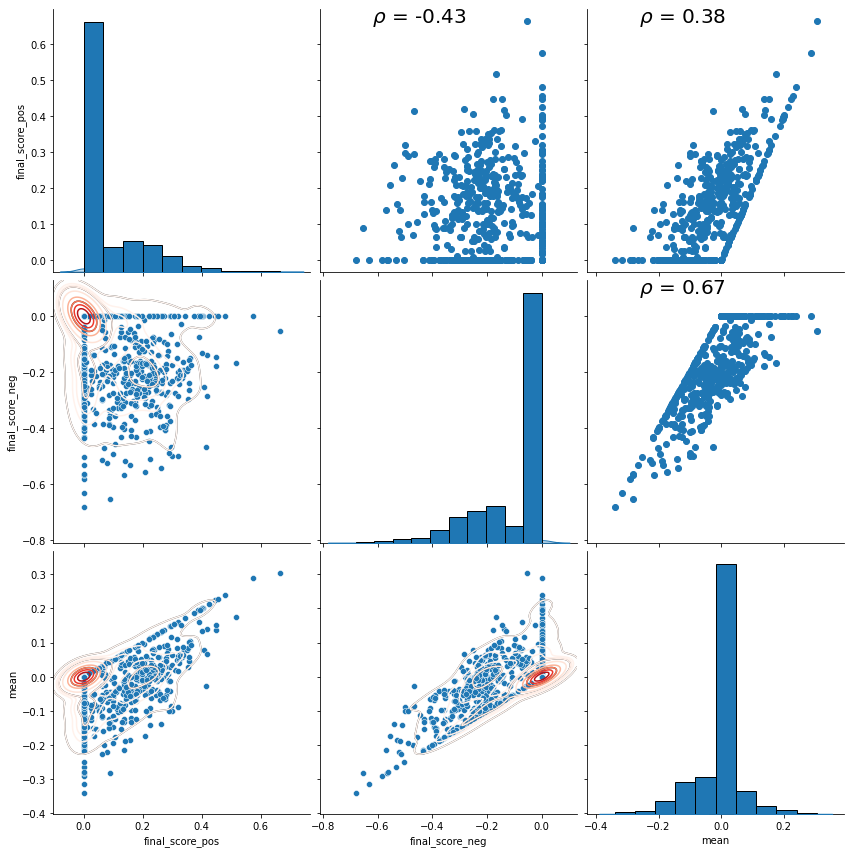

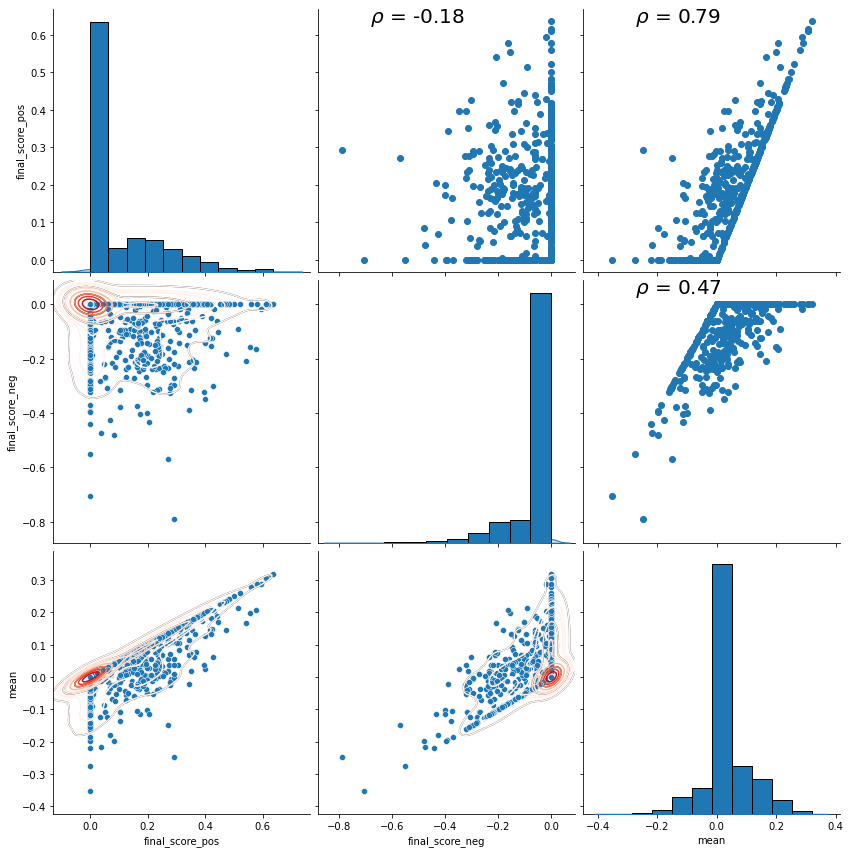

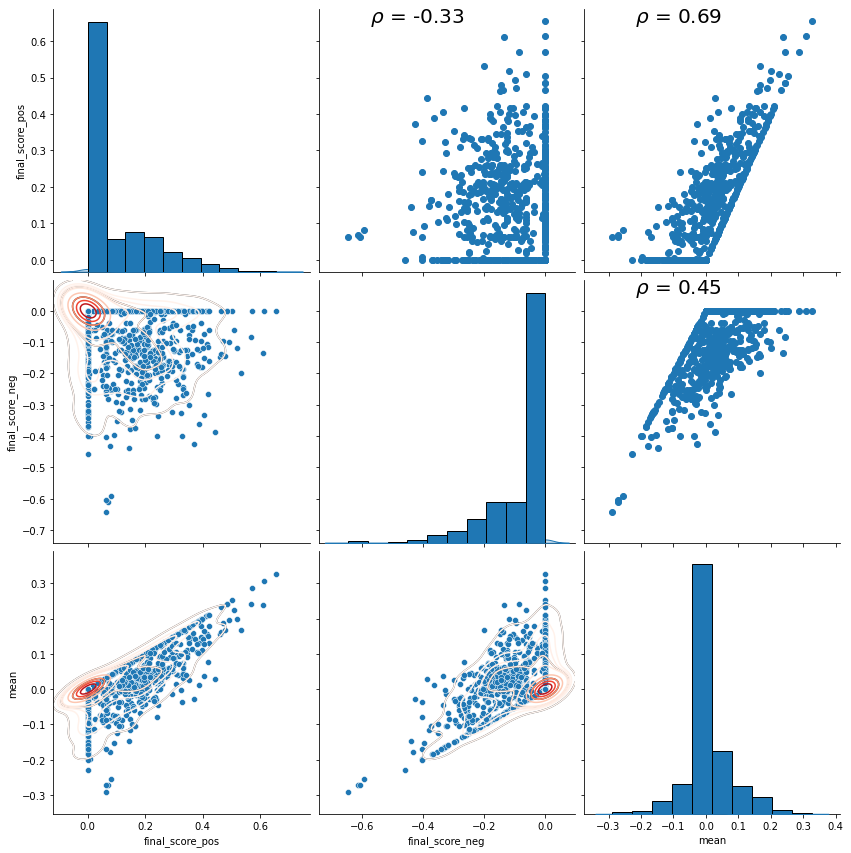

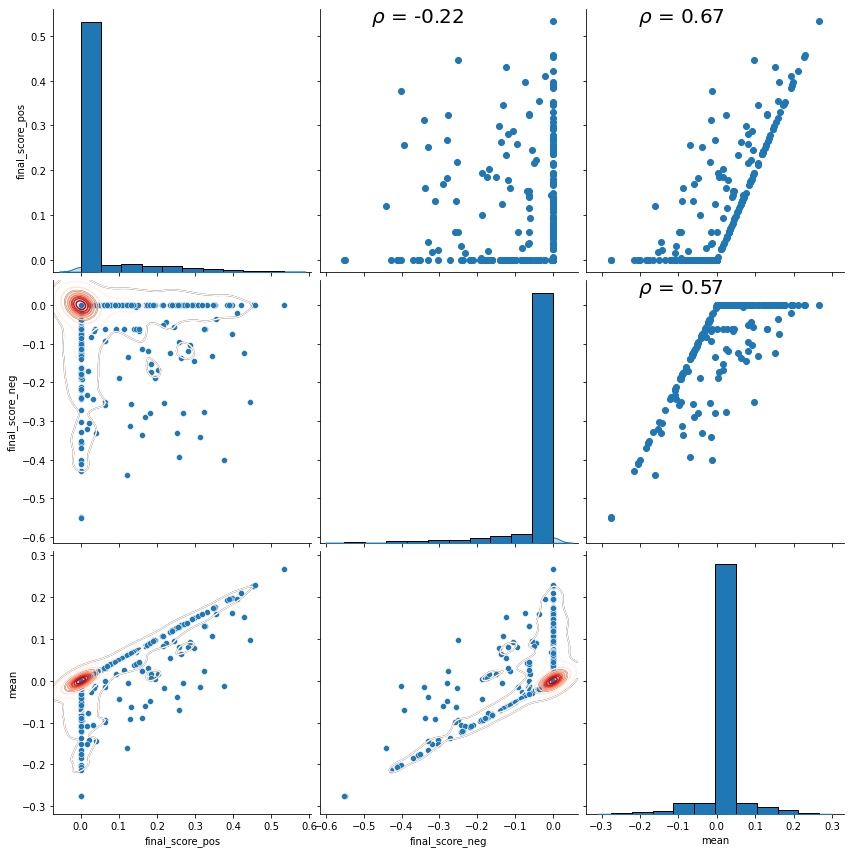

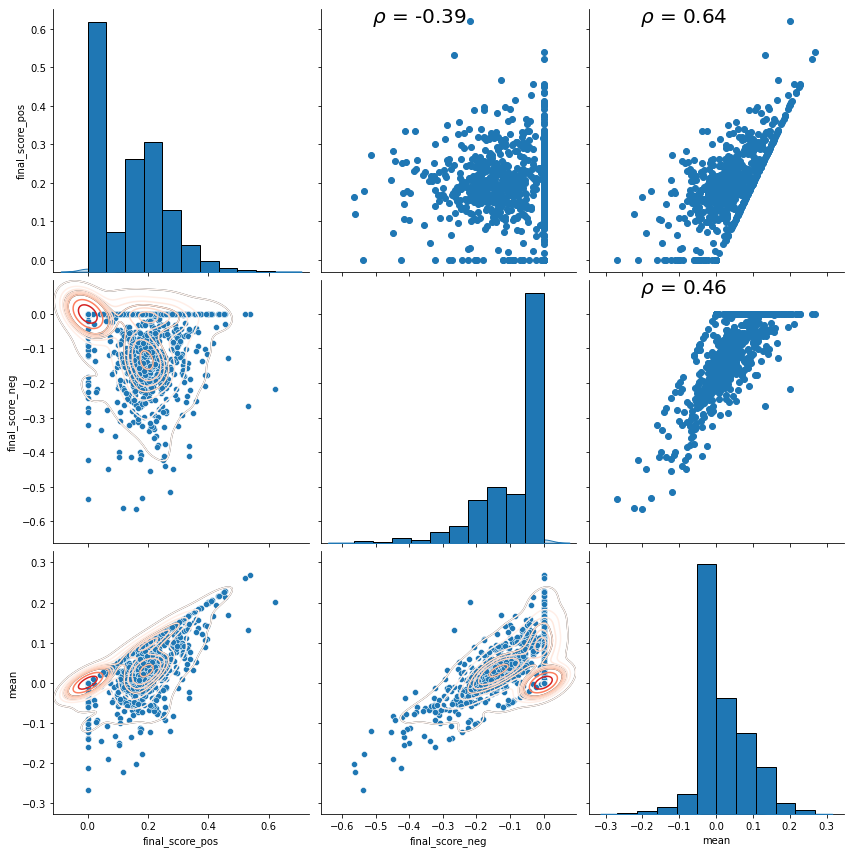

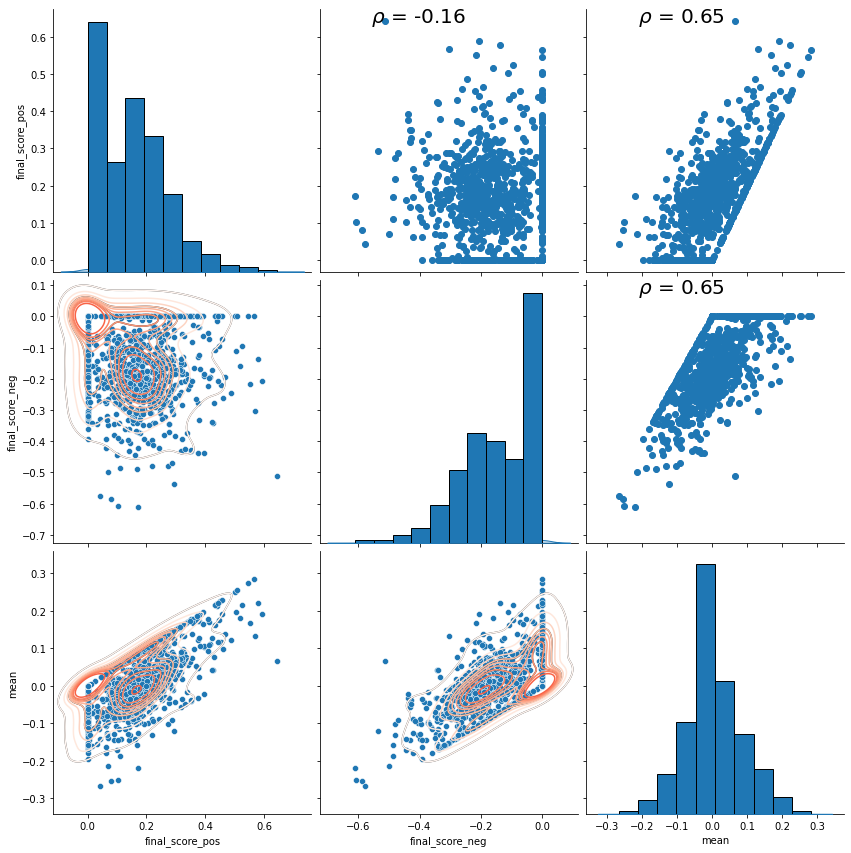

In [26]:
count = 1
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    df = pd.DataFrame(tweets_pd)

    del df['text']
    del df['vader_sentiment_analysis_score']
    del df['vader_sentiment_analysis_polarity']
    del df['oplexicon_sentiment_analysis_score']
    del df['oplexicon_sentiment_analysis_polarity']
    del df['sentistrength_sentiment_analysis_score']
    del df['sentistrength_sentiment_analysis_polarity']
    del df['sentilexpt_sentiment_analysis_score']
    del df['sentilexpt_sentiment_analysis_polarity']

    df = df.sort_values(by='created_at')

    df["created_at"] = pd.to_datetime(df["created_at"])
    df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
    df.set_index(df["date_minus_time"],inplace=True)

    df_pos = df.query("final_polarity == 'pos'")
    df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())

    df_neg = df.query("final_polarity == 'neg'")
    df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

    df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
    df_final = df_final.fillna(0)
    df_final.columns = ['final_score_pos', 'final_score_neg']

    df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

    g = sns.pairplot(df_final, diag_kind="kde", height=4)
    g.map_lower(sns.kdeplot, levels=4, color=".2")

    # Map the plots to the locations
    g = g.map_upper(plt.scatter)
    g = g.map_upper(corr)
    g = g.map_lower(sns.kdeplot, cmap = 'Reds')
    g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');
    
    count += 1

In [27]:
df_final

,final_score_pos,final_score_neg,mean
date_minus_time,,,
2018-04-01,0.412254,-0.072875,0.169689
2018-04-02,0.002925,-0.154442,-0.075758
2018-04-03,0.643635,-0.511661,0.065987
2018-04-04,0.236117,-0.252920,-0.008402
2018-04-05,0.454483,-0.219675,0.117404
...,...,...,...
2021-03-27,0.000000,-0.193461,-0.096731
2021-03-28,0.137288,0.000000,0.068644
2021-03-29,0.188708,-0.088175,0.050266


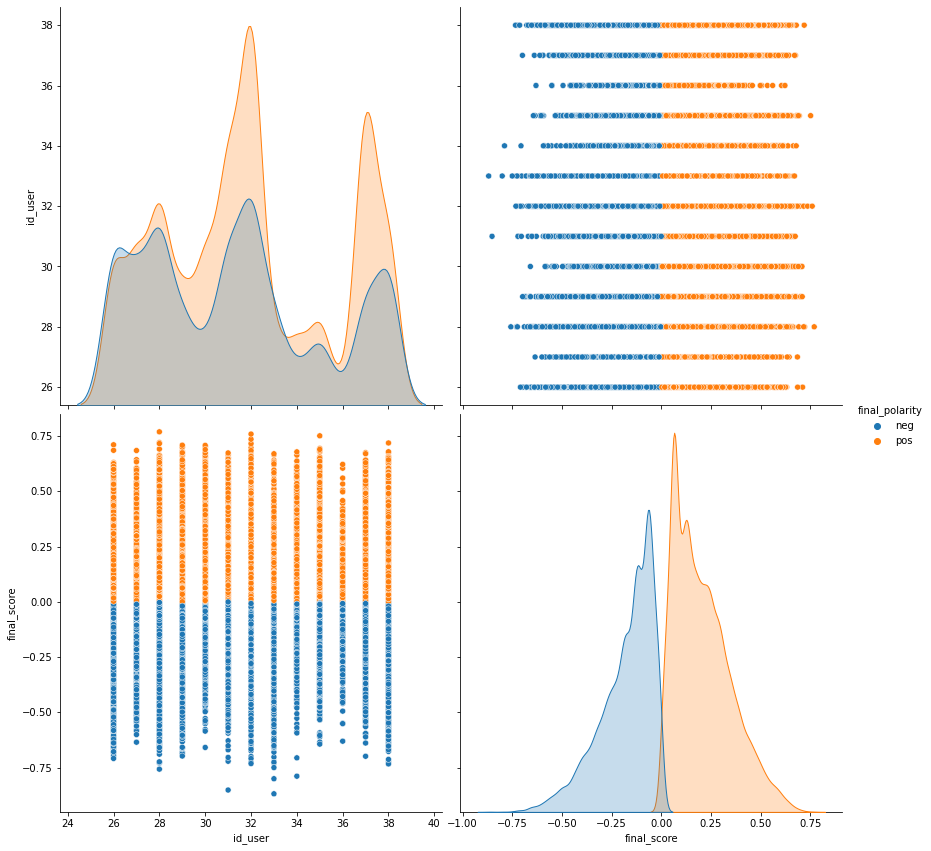

In [28]:
tweets = [data[d]['tweets'] for d in data]

final_tweets = []
for i in tweets:
    final_tweets.extend(i)

df = pd.DataFrame(final_tweets)

del df[0]
del df[1]
del df[4]
del df[5]
del df[6]
del df[18]

df.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]

del df['text']
del df['vader_sentiment_analysis_score']
del df['vader_sentiment_analysis_polarity']
del df['oplexicon_sentiment_analysis_score']
del df['oplexicon_sentiment_analysis_polarity']
del df['sentistrength_sentiment_analysis_score']
del df['sentistrength_sentiment_analysis_polarity']
del df['sentilexpt_sentiment_analysis_score']
del df['sentilexpt_sentiment_analysis_polarity']

df = df.sort_values(by='created_at')

# print(df)

df["created_at"] = pd.to_datetime(df["created_at"])
df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
# df.set_index(df["date_minus_time"],inplace=True)

df_final = df.query("final_polarity == 'pos' or final_polarity == 'neg'")

# df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())
# df_pos['final_score_mean'] = df_pos['final_score'].resample('D').mean()

# print(df_pos)


# df_neg = df.query("final_polarity == 'neg'")
# df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

# df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
# df_final = df_final.fillna(0)
# df_final.columns = ['final_score_pos', 'final_score_neg']

# df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)

# df_final.head()

sns.pairplot(df_final, diag_kind="kde", height=6, hue="final_polarity")

In [29]:
frames = []

count = 1
for c in data:
    id_user = c
    
    df_bf = pd.DataFrame(data[id_user]['bigfive'])
    
    if df_bf.empty == False:
        tweets_pd = create_tweets_pd(data, id_user)
        df = pd.DataFrame(tweets_pd)

        del df['text']
        del df['vader_sentiment_analysis_score']
        del df['vader_sentiment_analysis_polarity']
        del df['oplexicon_sentiment_analysis_score']
        del df['oplexicon_sentiment_analysis_polarity']
        del df['sentistrength_sentiment_analysis_score']
        del df['sentistrength_sentiment_analysis_polarity']
        del df['sentilexpt_sentiment_analysis_score']
        del df['sentilexpt_sentiment_analysis_polarity']

        df = df.sort_values(by='created_at')

        df["created_at"] = pd.to_datetime(df["created_at"])
        df['date_minus_time'] = df["created_at"].apply( lambda df : datetime.datetime(year=df.year, month=df.month, day=df.day))
        df.set_index(df["date_minus_time"],inplace=True)

        df_pos = df.query("final_polarity == 'pos'")

        df_pos = pd.DataFrame(df_pos['final_score'].resample('D').mean())

        df_neg = df.query("final_polarity == 'neg'")
        df_neg = pd.DataFrame(df_neg['final_score'].resample('D').mean())

        df_final = pd.merge(df_pos, df_neg, how="outer", on=["date_minus_time"])
        df_final = df_final.fillna(0)
        df_final.columns = ['final_score_pos', 'final_score_neg']

        df_final['mean'] = df_final.iloc[:, [0,1]].mean(axis=1)
        df_final.loc[df_final['mean'] > 0, ['mean_polarity']] = 'pos'
        df_final.loc[df_final['mean'] < 0, ['mean_polarity']] = 'neg'

    #     df_final = df_final.drop(df_final["mean_polarity"])
        df_final = df_final.dropna(how = 'any')

        df_final['id_user'] = id_user
        
        df_final['O'] = int(bigfive[id_user]['O'])
        df_final['C'] = int(bigfive[id_user]['C'])
        df_final['E'] = int(bigfive[id_user]['E'])
        df_final['A'] = int(bigfive[id_user]['A'])
        df_final['N'] = int(bigfive[id_user]['N'])

    #     g = sns.pairplot(df_final, diag_kind="kde", height=4)

        count += 1
        
        frames.append(df_final)

#         g = sns.pairplot(df_final, diag_kind="kde", height=6, hue="mean_polarity")
#         g.fig.suptitle("PairPlot - P{} - U{}".format(count, id_user), fontsize=20, y=1.02) # y= some height>1
    #     g.map_lower(sns.kdeplot, levels=4, color=".2")

    #     # Map the plots to the locations
    #     g = g.map_upper(plt.scatter)
    #     g = g.map_upper(corr)
    #     g = g.map_lower(sns.kdeplot)
    #     g = g.map_diag(plt.hist, bins = 10, edgecolor =  'k');

    
result = pd.concat(frames)

print(result)

# print(result.loc[result['mean_polarity'] == 'neg'])

# g = sns.pairplot(result, diag_kind="kde", height=6, hue="mean_polarity", vars=['final_score_pos', 
#                                                                             'O'
# #                                                                             'C',
# #                                                                             'E',
# #                                                                             'A',
# #                                                                             'N'
#                                                                               ])
# g.fig.suptitle("PairPlot", fontsize=20, y=1.02) # y= some height>1

                 final_score_pos  final_score_neg      mean mean_polarity  \
date_minus_time                                                             
2018-04-02              0.172350        -0.012900  0.079725           pos   
2018-04-03              0.000000        -0.264350 -0.132175           neg   
2018-04-04              0.247928        -0.223235  0.012346           pos   
2018-04-05              0.042875         0.000000  0.021437           pos   
2018-04-06              0.256600        -0.077383  0.089608           pos   
...                          ...              ...       ...           ...   
2021-03-27              0.000000        -0.193461 -0.096731           neg   
2021-03-28              0.137288         0.000000  0.068644           pos   
2021-03-29              0.188708        -0.088175  0.050266           pos   
2021-03-30              0.000000        -0.122658 -0.061329           neg   
2021-03-31              0.354608        -0.205717  0.074446           pos   

In [30]:
ids = result['id_user'].unique()
bf = ['O', 'C', 'E', 'A', 'N']

for b in bf:
    df_chart[b] = 0

for i in ids:
    for b in bf:
        df_chart.loc[df_chart['id_user'] == i, b] = int(bigfive[i][b])
        
        
df_chart.head()

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg,O,C,E,A,N
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673,37,43,36,24,26
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467,41,43,34,22,23
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977,43,46,31,24,15
3,29,1506,606,1237,44.968647,18.094954,36.936399,0.013734,0.016769,0,0,0,0,0
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077,17,33,33,22,39


In [31]:

# sns.scatterplot(data=df_chart, x="id_user", y="O", 
#                 size='por_pos', 
#                 legend=False, 
#                 sizes=(0, 500),
#                 cmap="Accent",
#                 alpha=0.6)


# plt.show()

In [32]:
df_chart = df_chart.drop(df_chart[df_chart['O'] == 0].index)
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg,O,C,E,A,N
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673,37,43,36,24,26
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467,41,43,34,22,23
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977,43,46,31,24,15
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077,17,33,33,22,39
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531,22,33,31,20,8
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541,35,35,32,26,16
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716,29,45,34,35,29
11,37,4284,650,1522,66.356877,10.068154,23.574969,0.098610,0.109649,40,46,38,22,21
12,38,2369,313,2026,50.318607,6.648258,43.033135,0.014957,0.016022,32,46,19,18,28


In [33]:
pos_list = df_chart['pos'].tolist()
o_list = df_chart['O'].tolist()
c_list = df_chart['C'].tolist()
e_list = df_chart['E'].tolist()
a_list = df_chart['A'].tolist()
n_list = df_chart['N'].tolist()

print('por_pos: mean=%.3f stdv=%.3f' % (np.mean(pos_list), np.std(pos_list)))
print('o: mean=%.3f stdv=%.3f' % (np.mean(o_list), np.std(o_list)))
print('c: mean=%.3f stdv=%.3f' % (np.mean(c_list), np.std(c_list)))
print('e: mean=%.3f stdv=%.3f' % (np.mean(e_list), np.std(e_list)))
print('a: mean=%.3f stdv=%.3f' % (np.mean(a_list), np.std(a_list)))
print('n: mean=%.3f stdv=%.3f' % (np.mean(n_list), np.std(n_list)))

r = np.corrcoef(pos_list, o_list)
print('r x o', r)
r = np.corrcoef(pos_list, c_list)
print('r x c', r)
r = np.corrcoef(pos_list, e_list)
print('r x e', r)
r = np.corrcoef(pos_list, a_list)
print('r x a', r)
r = np.corrcoef(pos_list, n_list)
print('r x n', r)

print('pearsonr pos x o: ',scipy.stats.pearsonr(pos_list, o_list))    # Pearson's r
print('pearsonr pos x c: ',scipy.stats.pearsonr(pos_list, c_list))    # Pearson's r
print('pearsonr pos x e: ',scipy.stats.pearsonr(pos_list, e_list))    # Pearson's r
print('pearsonr pos x a: ',scipy.stats.pearsonr(pos_list, a_list))    # Pearson's r
print('pearsonr pos x n: ',scipy.stats.pearsonr(pos_list, n_list))    # Pearson's r
print('spearmanr pos x o: ',scipy.stats.spearmanr(pos_list, o_list))   # Spearman's rho
print('spearmanr pos x c: ',scipy.stats.spearmanr(pos_list, c_list))   # Spearman's rho
print('spearmanr pos x e: ',scipy.stats.spearmanr(pos_list, e_list))   # Spearman's rho
print('spearmanr pos x a: ',scipy.stats.spearmanr(pos_list, a_list))   # Spearman's rho
print('spearmanr pos x n: ',scipy.stats.spearmanr(pos_list, n_list))   # Spearman's rho
print('kendalltau pos x o: ',scipy.stats.kendalltau(pos_list, o_list))  # Kendall's tau
print('kendalltau pos x c: ',scipy.stats.kendalltau(pos_list, c_list))  # Kendall's tau
print('kendalltau pos x e: ',scipy.stats.kendalltau(pos_list, e_list))  # Kendall's tau
print('kendalltau pos x a: ',scipy.stats.kendalltau(pos_list, a_list))  # Kendall's tau
print('kendalltau pos x n: ',scipy.stats.kendalltau(pos_list, n_list))  # Kendall's tau

por_pos: mean=2316.111 stdv=987.417
o: mean=32.889 stdv=8.346
c: mean=41.111 stdv=5.405
e: mean=32.000 stdv=5.077
a: mean=23.667 stdv=4.570
n: mean=22.778 stdv=8.612
r x o [[1.         0.13203934]
 [0.13203934 1.        ]]
r x c [[1.         0.19352454]
 [0.19352454 1.        ]]
r x e [[1.         0.11367544]
 [0.11367544 1.        ]]
r x a [[ 1.        -0.5564671]
 [-0.5564671  1.       ]]
r x n [[ 1.         -0.33178867]
 [-0.33178867  1.        ]]
pearsonr pos x o:  (0.1320393401954019, 0.7348891073123518)
pearsonr pos x c:  (0.19352453689230867, 0.6178529123888891)
pearsonr pos x e:  (0.11367544325331343, 0.7709015365828432)
pearsonr pos x a:  (-0.5564670974506001, 0.11969191114716154)
pearsonr pos x n:  (-0.3317886742860499, 0.383060701535504)
spearmanr pos x o:  SpearmanrResult(correlation=0.11666666666666665, pvalue=0.7650079429261462)
spearmanr pos x c:  SpearmanrResult(correlation=0.290693866424127, pvalue=0.44793559214112977)
spearmanr pos x e:  SpearmanrResult(correlation=-0

In [34]:
neg_list = df_chart['neg'].tolist()
o_list = df_chart['O'].tolist()
c_list = df_chart['C'].tolist()
e_list = df_chart['E'].tolist()
a_list = df_chart['A'].tolist()
n_list = df_chart['N'].tolist()

print('por_neg: mean=%.3f stdv=%.3f' % (np.mean(neg_list), np.std(neg_list)))
print('o: mean=%.3f stdv=%.3f' % (np.mean(o_list), np.std(o_list)))
print('c: mean=%.3f stdv=%.3f' % (np.mean(c_list), np.std(c_list)))
print('e: mean=%.3f stdv=%.3f' % (np.mean(e_list), np.std(e_list)))
print('a: mean=%.3f stdv=%.3f' % (np.mean(a_list), np.std(a_list)))
print('n: mean=%.3f stdv=%.3f' % (np.mean(n_list), np.std(n_list)))

r = np.corrcoef(neg_list, o_list)
print('r x o', r)
r = np.corrcoef(neg_list, c_list)
print('r x c', r)
r = np.corrcoef(neg_list, e_list)
print('r x e', r)
r = np.corrcoef(neg_list, a_list)
print('r x a', r)
r = np.corrcoef(neg_list, n_list)
print('r x n', r)

print('pearsonr neg_pos x o: ',scipy.stats.pearsonr(neg_list, o_list))    # Pearson's r
print('pearsonr neg_pos x c: ',scipy.stats.pearsonr(neg_list, c_list))    # Pearson's r
print('pearsonr neg_pos x e: ',scipy.stats.pearsonr(neg_list, e_list))    # Pearson's r
print('pearsonr neg_pos x a: ',scipy.stats.pearsonr(neg_list, a_list))    # Pearson's r
print('pearsonr neg_pos x n: ',scipy.stats.pearsonr(neg_list, n_list))    # Pearson's r
print('spearmanr neg_pos x o: ',scipy.stats.spearmanr(neg_list, o_list))   # Spearman's rho
print('spearmanr neg_pos x c: ',scipy.stats.spearmanr(neg_list, c_list))   # Spearman's rho
print('spearmanr neg_pos x e: ',scipy.stats.spearmanr(neg_list, e_list))   # Spearman's rho
print('spearmanr neg_pos x a: ',scipy.stats.spearmanr(neg_list, a_list))   # Spearman's rho
print('spearmanr neg_pos x n: ',scipy.stats.spearmanr(neg_list, n_list))   # Spearman's rho
print('kendalltau neg_pos x o: ',scipy.stats.kendalltau(neg_list, o_list))  # Kendall's tau
print('kendalltau neg_pos x c: ',scipy.stats.kendalltau(neg_list, c_list))  # Kendall's tau
print('kendalltau neg_pos x e: ',scipy.stats.kendalltau(neg_list, e_list))  # Kendall's tau
print('kendalltau neg_pos x a: ',scipy.stats.kendalltau(neg_list, a_list))  # Kendall's tau
print('kendalltau neg_pos x n: ',scipy.stats.kendalltau(neg_list, n_list))  # Kendall's tau

por_neg: mean=1631.667 stdv=687.533
o: mean=32.889 stdv=8.346
c: mean=41.111 stdv=5.405
e: mean=32.000 stdv=5.077
a: mean=23.667 stdv=4.570
n: mean=22.778 stdv=8.612
r x o [[1.         0.38316403]
 [0.38316403 1.        ]]
r x c [[1.         0.41797924]
 [0.41797924 1.        ]]
r x e [[ 1.         -0.20215457]
 [-0.20215457  1.        ]]
r x a [[ 1.         -0.45649156]
 [-0.45649156  1.        ]]
r x n [[ 1.         -0.38797277]
 [-0.38797277  1.        ]]
pearsonr neg_pos x o:  (0.38316403086262707, 0.30872712887951176)
pearsonr neg_pos x c:  (0.4179792389855541, 0.2629287697570781)
pearsonr neg_pos x e:  (-0.2021545655135473, 0.6019423359000717)
pearsonr neg_pos x a:  (-0.4564915589520424, 0.21677382644816284)
pearsonr neg_pos x n:  (-0.38797277243482137, 0.30217603005578453)
spearmanr neg_pos x o:  SpearmanrResult(correlation=0.43333333333333335, pvalue=0.2439524358800516)
spearmanr neg_pos x c:  SpearmanrResult(correlation=0.3419927840283847, pvalue=0.3676791124519518)
spearmanr 

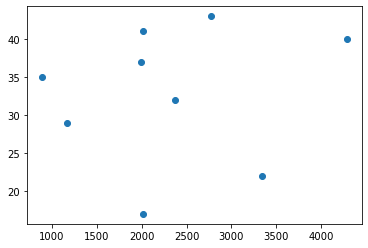

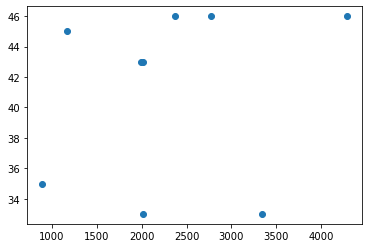

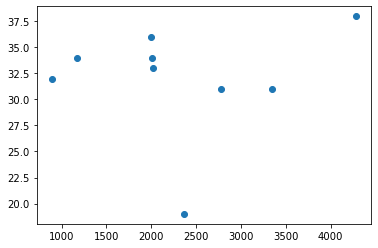

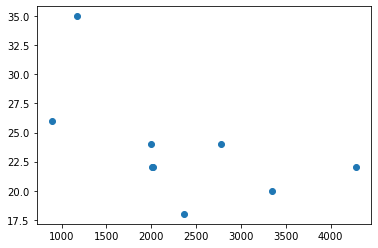

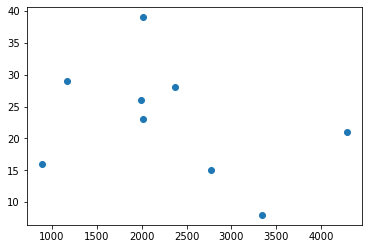

In [35]:
plt.scatter(pos_list, o_list)
plt.show()

plt.scatter(pos_list, c_list)
plt.show()

plt.scatter(pos_list, e_list)
plt.show()

plt.scatter(pos_list, a_list)
plt.show()

plt.scatter(pos_list, n_list)
plt.show()

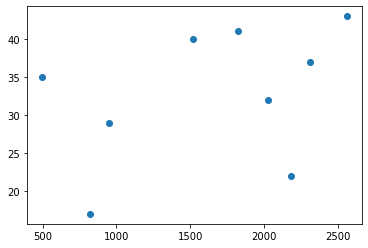

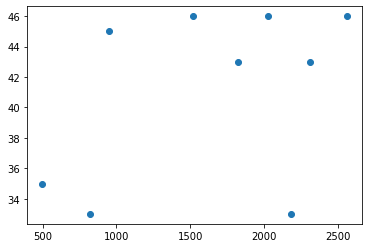

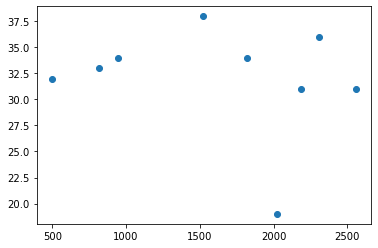

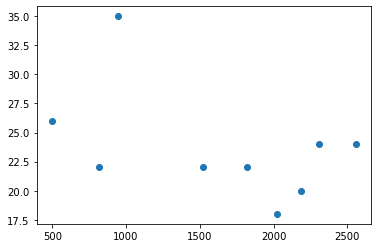

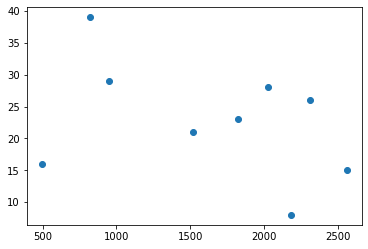

In [36]:
plt.scatter(neg_list, o_list)
plt.show()

plt.scatter(neg_list, c_list)
plt.show()

plt.scatter(neg_list, e_list)
plt.show()

plt.scatter(neg_list, a_list)
plt.show()

plt.scatter(neg_list, n_list)
plt.show()

In [37]:
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, o_list)
o_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, c_list)
c_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, e_list)
e_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, a_list)
a_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(pos_list, n_list)
n_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


print('o x pos: ',o_line)
print('c x pos: ',c_line)
print('e x pos: ',e_line)
print('a x pos: ',a_line)
print('n x pos: ',n_line)

slope, intercept, r, p, stderr = scipy.stats.linregress(neg_list, o_list)
o_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(neg_list, c_list)
c_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(neg_list, e_list)
e_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(neg_list, a_list)
a_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
slope, intercept, r, p, stderr = scipy.stats.linregress(neg_list, n_list)
n_line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'


print('o x neg: ',o_line)
print('c x neg: ',c_line)
print('e x neg: ',e_line)
print('a x neg: ',a_line)
print('n x neg: ',n_line)

o x pos:  Regression line: y=30.30+0.00x, r=0.13
c x pos:  Regression line: y=38.66+0.00x, r=0.19
e x pos:  Regression line: y=30.65+0.00x, r=0.11
a x pos:  Regression line: y=29.63+-0.00x, r=-0.56
n x pos:  Regression line: y=29.48+-0.00x, r=-0.33
o x neg:  Regression line: y=25.30+0.00x, r=0.38
c x neg:  Regression line: y=35.75+0.00x, r=0.42
e x neg:  Regression line: y=34.44+-0.00x, r=-0.20
a x neg:  Regression line: y=28.62+-0.00x, r=-0.46
n x neg:  Regression line: y=30.71+-0.00x, r=-0.39


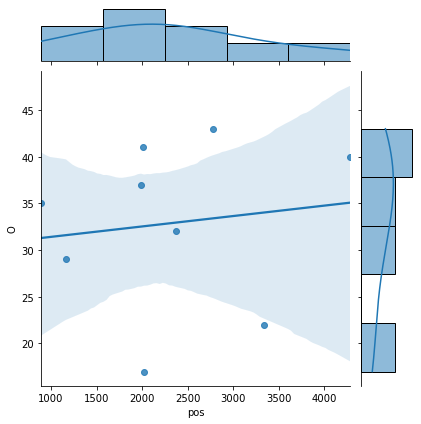

In [62]:
sns.jointplot(data=df_chart, x='pos', y='O', kind='reg')

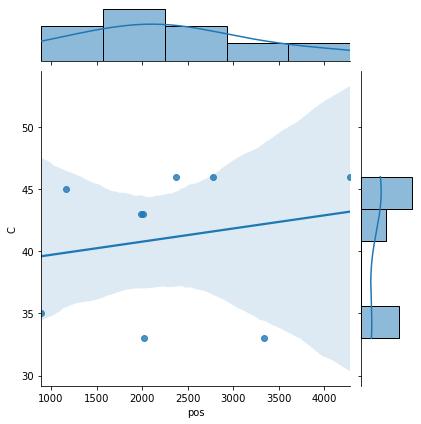

In [63]:
sns.jointplot(data=df_chart, x='pos', y='C', kind='reg')

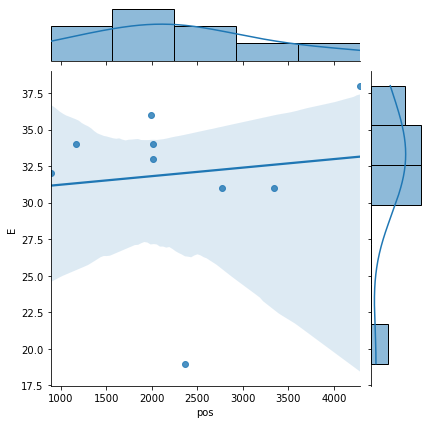

In [64]:
sns.jointplot(data=df_chart, x='pos', y='E', kind='reg')

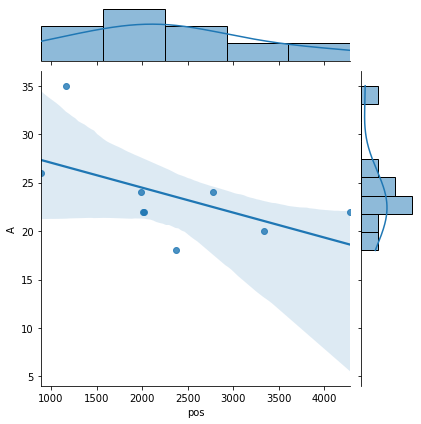

In [65]:
sns.jointplot(data=df_chart, x='pos', y='A', kind='reg')

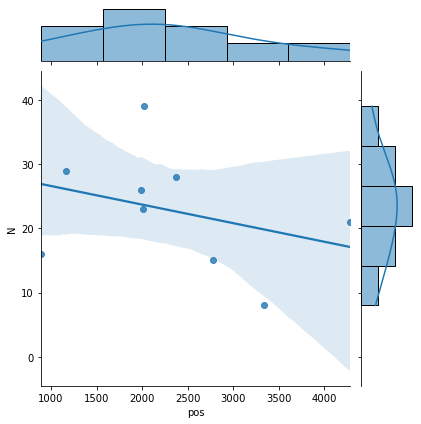

In [66]:
sns.jointplot(data=df_chart, x='pos', y='N', kind='reg')

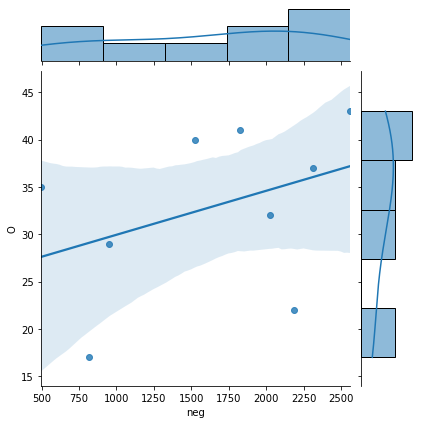

In [67]:
sns.jointplot(data=df_chart, x='neg', y='O', kind='reg')

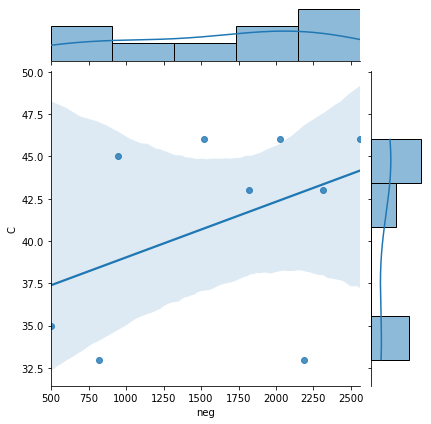

In [68]:
sns.jointplot(data=df_chart, x='neg', y='C', kind='reg')

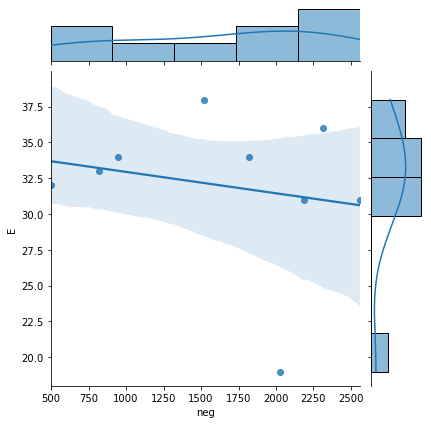

In [69]:
sns.jointplot(data=df_chart, x='neg', y='E', kind='reg')

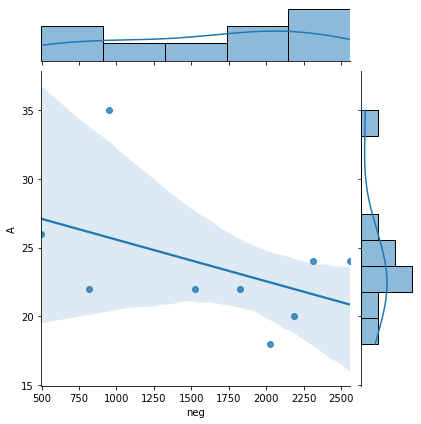

In [70]:
sns.jointplot(data=df_chart, x='neg', y='A', kind='reg')

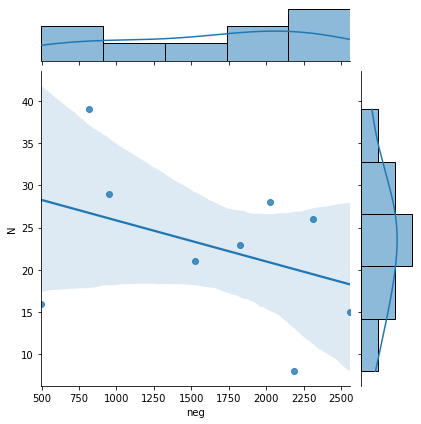

In [71]:
sns.jointplot(data=df_chart, x='neg', y='N', kind='reg')

In [39]:
pg.corr(x=df_chart['pos'], y=df_chart['O'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,9,0.132039,"[-0.58, 0.73]",0.017434,-0.310087,0.734889,0.428,0.062444


In [40]:
pg.pairwise_corr(df_chart).sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
70,mean_all,mean_posneg,9,0.999489,9.937971e-12
64,por_neg,mean_posneg,9,-0.970729,1.372943e-05
63,por_neg,mean_all,9,-0.968508,1.769474e-05
48,por_pos,mean_all,9,0.938845,1.753619e-04
49,por_pos,mean_posneg,9,0.930145,2.769190e-04


In [41]:
corr_pos = pg.pairwise_corr(df_chart, columns=[['pos'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_pos

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,pos,O,spearman,two-sided,9,0.116667,"[-0.59, 0.72]",0.013611,-0.315185,0.117200,0.765008,0.059418
1,pos,C,spearman,two-sided,9,0.290694,"[-0.46, 0.8]",0.084503,-0.220663,0.299324,0.447936,0.119591
2,pos,E,spearman,two-sided,9,-0.142862,"[-0.74, 0.58]",0.020410,-0.306121,-0.143846,0.713868,0.064816
3,pos,A,spearman,two-sided,9,-0.681005,"[-0.93, -0.03]",0.463768,0.285024,-0.830986,0.043434,0.567454
4,pos,N,spearman,two-sided,9,-0.383333,"[-0.83, 0.38]",0.146944,-0.137407,-0.403961,0.308495,0.179610


In [42]:
corr_neg = pg.pairwise_corr(df_chart, columns=[['neg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_neg

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,neg,O,spearman,two-sided,9,0.433333,"[-0.32, 0.85]",0.187778,-0.082963,0.463993,0.243952,0.222291
1,neg,C,spearman,two-sided,9,0.341993,"[-0.42, 0.82]",0.116959,-0.177388,0.356348,0.367679,0.149981
2,neg,E,spearman,two-sided,9,-0.218495,"[-0.77, 0.52]",0.047740,-0.269680,-0.222075,0.572215,0.087316
3,neg,A,spearman,two-sided,9,-0.263890,"[-0.79, 0.49]",0.069638,-0.240483,-0.270284,0.492636,0.106264
4,neg,N,spearman,two-sided,9,-0.400000,"[-0.84, 0.36]",0.160000,-0.120000,-0.423649,0.286105,0.192967


In [43]:
corr_mean_pn = pg.pairwise_corr(df_chart, columns=[['mean_posneg'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_pn

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,mean_posneg,O,spearman,two-sided,9,-0.566667,"[-0.89, 0.16]",0.321111,0.094815,-0.642599,0.111633,0.378760
1,mean_posneg,C,spearman,two-sided,9,-0.367642,"[-0.83, 0.39]",0.135161,-0.153119,-0.385694,0.330356,0.167790
2,mean_posneg,E,spearman,two-sided,9,0.067229,"[-0.62, 0.7]",0.004520,-0.327307,0.067331,0.863556,0.052324
3,mean_posneg,A,spearman,two-sided,9,-0.144714,"[-0.74, 0.57]",0.020942,-0.305411,-0.145737,0.710288,0.065242
4,mean_posneg,N,spearman,two-sided,9,0.133333,"[-0.58, 0.73]",0.017778,-0.309630,0.134132,0.732368,0.062717


In [44]:
corr_mean_all = pg.pairwise_corr(df_chart, columns=[['mean_all'],['O', 'C', 'E', 'A', 'N']], method='spearman')
corr_mean_all

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,power
0,mean_all,O,spearman,two-sided,9,-0.566667,"[-0.89, 0.16]",0.321111,0.094815,-0.642599,0.111633,0.378760
1,mean_all,C,spearman,two-sided,9,-0.367642,"[-0.83, 0.39]",0.135161,-0.153119,-0.385694,0.330356,0.167790
2,mean_all,E,spearman,two-sided,9,0.067229,"[-0.62, 0.7]",0.004520,-0.327307,0.067331,0.863556,0.052324
3,mean_all,A,spearman,two-sided,9,-0.144714,"[-0.74, 0.57]",0.020942,-0.305411,-0.145737,0.710288,0.065242
4,mean_all,N,spearman,two-sided,9,0.133333,"[-0.58, 0.73]",0.017778,-0.309630,0.134132,0.732368,0.062717


In [45]:
df_chart.corr(method='spearman').round(4)

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg,O,C,E,A,N
id_user,1.0000,0.2167,-0.5833,-0.4000,0.5667,-0.5000,-0.4667,0.5167,0.5167,-0.3167,0.3762,-0.2269,-0.2213,0.1167
pos,0.2167,1.0000,0.1500,0.4500,0.4333,-0.7000,-0.2000,0.1667,0.1667,0.1167,0.2907,-0.1429,-0.6810,-0.3833
neu,-0.5833,0.1500,1.0000,0.5167,-0.5500,0.4167,0.3833,-0.5500,-0.5500,0.5833,0.2565,0.6807,0.1277,-0.0500
neg,-0.4000,0.4500,0.5167,1.0000,-0.5167,-0.2833,0.7500,-0.7667,-0.7667,0.4333,0.3420,-0.2185,-0.2639,-0.4000
por_pos,0.5667,0.4333,-0.5500,-0.5167,1.0000,-0.5333,-0.8667,0.9000,0.9000,-0.3333,-0.1282,-0.0924,-0.2809,-0.1167
por_neu,-0.5000,-0.7000,0.4167,-0.2833,-0.5333,1.0000,0.1333,-0.2000,-0.2000,0.0667,-0.2137,0.5799,0.6895,0.4500
por_neg,-0.4667,-0.2000,0.3833,0.7500,-0.8667,0.1333,1.0000,-0.9667,-0.9667,0.4000,0.3163,-0.2269,0.0936,-0.0167
mean_all,0.5167,0.1667,-0.5500,-0.7667,0.9000,-0.2000,-0.9667,1.0000,1.0000,-0.5667,-0.3676,0.0672,-0.1447,0.1333
mean_posneg,0.5167,0.1667,-0.5500,-0.7667,0.9000,-0.2000,-0.9667,1.0000,1.0000,-0.5667,-0.3676,0.0672,-0.1447,0.1333
O,-0.3167,0.1167,0.5833,0.4333,-0.3333,0.0667,0.4000,-0.5667,-0.5667,1.0000,0.6070,0.2353,0.1958,-0.4167


In [46]:
pg.corr(df_chart['pos'], df_chart['A']).round(4)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,9,-0.5565,"[-0.89, 0.17]",0.3097,0.0795,0.1197,1.18,0.3644


Text(0.5, 1.0, 'Correlation matrix')

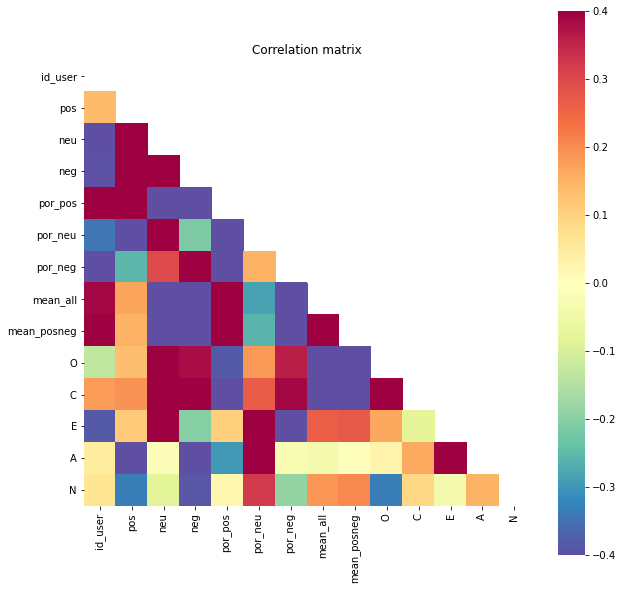

In [47]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

corrs = df_chart.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [48]:
df_chart.rcorr(method='spearman', upper='pval', decimals=3, padjust=None, stars=False)

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg,O,C,E,A,N
id_user,-,0.576,0.099,0.286,0.112,0.170,0.205,0.154,0.154,0.406,0.318,0.557,0.567,0.765
pos,0.217,-,0.700,0.224,0.244,0.036,0.606,0.668,0.668,0.765,0.448,0.714,0.043,0.308
neu,-0.583,0.15,-,0.154,0.125,0.265,0.308,0.125,0.125,0.099,0.505,0.044,0.743,0.898
neg,-0.4,0.45,0.517,-,0.154,0.460,0.02,0.016,0.016,0.244,0.368,0.572,0.493,0.286
por_pos,0.567,0.433,-0.55,-0.517,-,0.139,0.002,0.001,0.001,0.381,0.742,0.813,0.464,0.765
por_neu,-0.5,-0.7,0.417,-0.283,-0.533,-,0.732,0.606,0.606,0.865,0.581,0.102,0.04,0.224
por_neg,-0.467,-0.2,0.383,0.75,-0.867,0.133,-,0.000,0.000,0.286,0.407,0.557,0.811,0.966
mean_all,0.517,0.167,-0.55,-0.767,0.9,-0.2,-0.967,-,0.,0.112,0.330,0.864,0.710,0.732
mean_posneg,0.517,0.167,-0.55,-0.767,0.9,-0.2,-0.967,1.0,-,0.112,0.330,0.864,0.710,0.732
O,-0.317,0.117,0.583,0.433,-0.333,0.067,0.4,-0.567,-0.567,-,0.083,0.542,0.614,0.265


In [49]:
pg.homoscedasticity(df_chart)

,W,pval,equal_var
levene,0.3397,0.948791,True


In [50]:
pg.normality(df_chart)

,W,pval,normal
id_user,0.937227,0.553027,True
pos,0.952917,0.722080,True
neu,0.946411,0.650747,True
neg,0.933225,0.512646,True
por_pos,0.950169,0.691915,True
por_neu,0.920437,0.395867,True
por_neg,0.926172,0.445767,True
mean_all,0.929320,0.474894,True
mean_posneg,0.932816,0.508611,True
O,0.928189,0.464295,True


In [51]:
df_chart

,id_user,pos,neu,neg,por_pos,por_neu,por_neg,mean_all,mean_posneg,O,C,E,A,N
0,26,1991,737,2311,39.511808,14.625918,45.862274,-0.009966,-0.011673,37,43,36,24,26
1,27,2009,718,1822,44.163552,15.783689,40.052759,0.011342,0.013467,41,43,34,22,23
2,28,2774,599,2560,46.755436,10.096073,43.148491,0.009869,0.010977,43,46,31,24,15
4,30,2016,339,817,63.556116,10.687264,25.756620,0.117962,0.132077,17,33,33,22,39
5,31,3342,470,2184,55.737158,7.838559,36.424283,0.053021,0.057531,22,33,31,20,8
8,34,890,159,496,57.605178,10.291262,32.103560,0.079429,0.088541,35,35,32,26,16
9,35,1170,478,947,45.086705,18.420039,36.493256,0.036479,0.044716,29,45,34,35,29
11,37,4284,650,1522,66.356877,10.068154,23.574969,0.098610,0.109649,40,46,38,22,21
12,38,2369,313,2026,50.318607,6.648258,43.033135,0.014957,0.016022,32,46,19,18,28


In [52]:
print(pg.mwu(df_chart['pos'], df_chart['O']))
print(pg.mwu(df_chart['neg'], df_chart['O']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [53]:
print(pg.mwu(df_chart['pos'], df_chart['C']))
print(pg.mwu(df_chart['neg'], df_chart['C']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000395 -1.0   1.0


In [54]:
print(pg.mwu(df_chart['pos'], df_chart['E']))
print(pg.mwu(df_chart['neg'], df_chart['E']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000407 -1.0   1.0


In [55]:
print(pg.mwu(df_chart['pos'], df_chart['A']))
print(pg.mwu(df_chart['neg'], df_chart['A']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000398 -1.0   1.0


In [56]:
print(pg.mwu(df_chart['pos'], df_chart['N']))
print(pg.mwu(df_chart['neg'], df_chart['N']))

     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0
     U-val       tail     p-val  RBC  CLES
MWU   81.0  two-sided  0.000412 -1.0   1.0


In [57]:
print(pg.kruskal(data=df_chart, dv='pos', between='O'))
print(pg.kruskal(data=df_chart, dv='neg', between='O'))

        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      O      8  8.0  0.43347


In [58]:
print(pg.kruskal(data=df_chart, dv='pos', between='C'))
print(pg.kruskal(data=df_chart, dv='neg', between='C'))

        Source  ddof1         H     p-unc
Kruskal      C      4  6.711111  0.151965
        Source  ddof1         H     p-unc
Kruskal      C      4  4.044444  0.400024


In [59]:
print(pg.kruskal(data=df_chart, dv='pos', between='E'))
print(pg.kruskal(data=df_chart, dv='neg', between='E'))

        Source  ddof1         H     p-unc
Kruskal      E      6  7.666667  0.263555
        Source  ddof1         H     p-unc
Kruskal      E      6  7.466667  0.279835


In [60]:
print(pg.kruskal(data=df_chart, dv='pos', between='A'))
print(pg.kruskal(data=df_chart, dv='neg', between='A'))

        Source  ddof1         H     p-unc
Kruskal      A      5  5.066667  0.407798
        Source  ddof1         H     p-unc
Kruskal      A      5  7.311111  0.198512


In [61]:
print(pg.kruskal(data=df_chart, dv='pos', between='N'))
print(pg.kruskal(data=df_chart, dv='neg', between='N'))

        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
        Source  ddof1    H    p-unc
Kruskal      N      8  8.0  0.43347
